In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ITER = 200000
lr = 1e-6

In [62]:
def AGD(x, A):
    z, norm_lst = x, []
    lamb, gamma = 1, 0
    for i in range(10000):
        norm_lst.append(np.linalg.norm(A @ x) ** 2 + 1e-6)
        if i > 3:
            lamb, gamma = 6 / (i * (i - 1)), 2 / i
        y = lr * ((1 - gamma) * x + gamma * z)
        f_grad = 2 * A.T @ A @ y
        z = lr * (z - (gamma / lamb) * f_grad)
        x = y - f_grad
    return x, norm_lst

In [63]:
A = np.random.normal(0, 1, (20, 20))
A.shape

(20, 20)

In [64]:
x_AGD, AGD_norm_lst = AGD(np.ones((20,)), A)

In [65]:
def GD(x, A):
    norm_lst = []
    for _ in range(10000):
        norm_lst.append(np.linalg.norm(A @ x) ** 2)
        x = x - 1e-3 * 2 * A.T @ A @ x
    return x, norm_lst

In [66]:
x_GD, GD_norm_lst = GD(np.ones((20,)), A)

Text(0.5, 1.0, 'loglog')

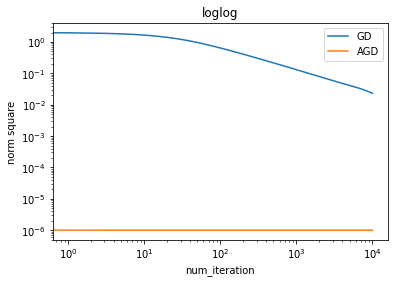

In [87]:
fig = plt.figure(figsize=(6, 4))
ax = plt.axes()

x = np.arange(0, 50)
ax.loglog(np.arange(10000), GD_norm_lst, label='GD')
ax.loglog(np.arange(10000), AGD_norm_lst, label='AGD')
ax.legend()
ax.set_xlabel('num_iteration')
ax.set_ylabel('norm square')
ax.set_title('loglog')

In [73]:
np.linalg.norm(A @ x_GD) ** 2

0.0004157828402733921

In [74]:
np.linalg.norm(A @ x_AGD) ** 2

0.0

In [78]:
def gen_A():
    A = np.zeros((20, 20))
    for i in range(20):
        if i - 1 >= 0:
            A[i][i - 1] = -1
        if i + 1 <= 19:
            A[i][i + 1] = -1
        A[i][i] = 2
    return A

In [79]:
A = gen_A()
x_2_AGD, AGD_norm_lst = AGD(np.ones(20,), A)

In [80]:
np.linalg.norm(A @ x_2_AGD) ** 2

0.0

In [81]:
x_2_GD, GD_norm_lst = GD(np.ones(20,), A)

In [82]:
np.linalg.norm(A @ x_2_GD) ** 2

0.023229089360321146

Text(0.5, 1.0, 'loglog scale')

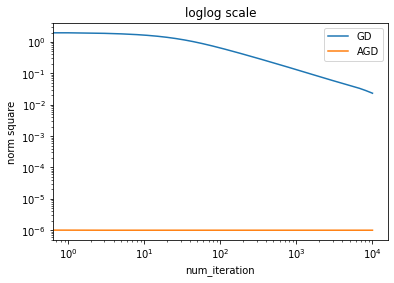

In [88]:
fig = plt.figure(figsize=(6, 4))
ax = plt.axes()

x = np.arange(0, 50)
ax.loglog(np.arange(10000), GD_norm_lst, label='GD')
ax.loglog(np.arange(10000), AGD_norm_lst, label='AGD')
ax.legend()
ax.set_xlabel('num_iteration')
ax.set_ylabel('norm square')
ax.set_title('loglog scale')